## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())
print(len(data))

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

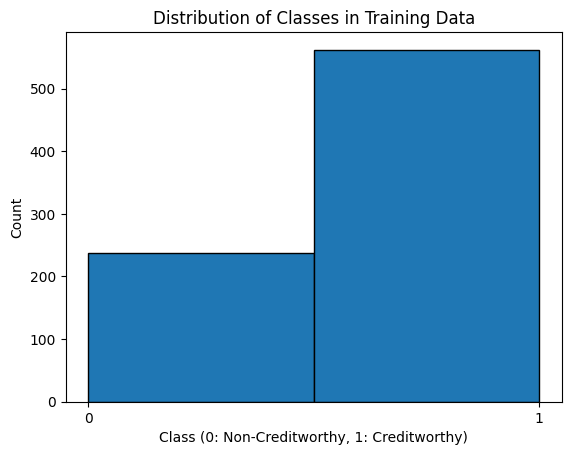

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [5]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.56
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

## Результаты:
Наилучший результат получен при помощи модели "MLP + Norm + Filt.Features" (ячейка 16)
- ROC AUC: 0.798
- Accuracy: 0.775
- Precision: 0.804
- Recall: 0.891


### 
Ниже идут все эксперементы, которые были проведены

In [6]:
def test_classifier(clf, name, test_inp=None):
    if test_inp is None:
        test_inp = X_test
    pred = clf.predict(test_inp)
    pred_probs = clf.predict_proba(test_inp)[:, 1]

    roc_auc = roc_auc_score(y_test, pred_probs)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print(f'{name} метрики:')
    print(f'ROC AUC: {roc_auc:.3f}')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    return roc_auc

In [7]:
norm_offset = -X_train.mean(axis=0, keepdims=True)
norm_scale = 1 / X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train + norm_offset) * norm_scale
X_test_scaled = (X_test + norm_offset) * norm_scale

(562, 20)


<BarContainer object of 20 artists>

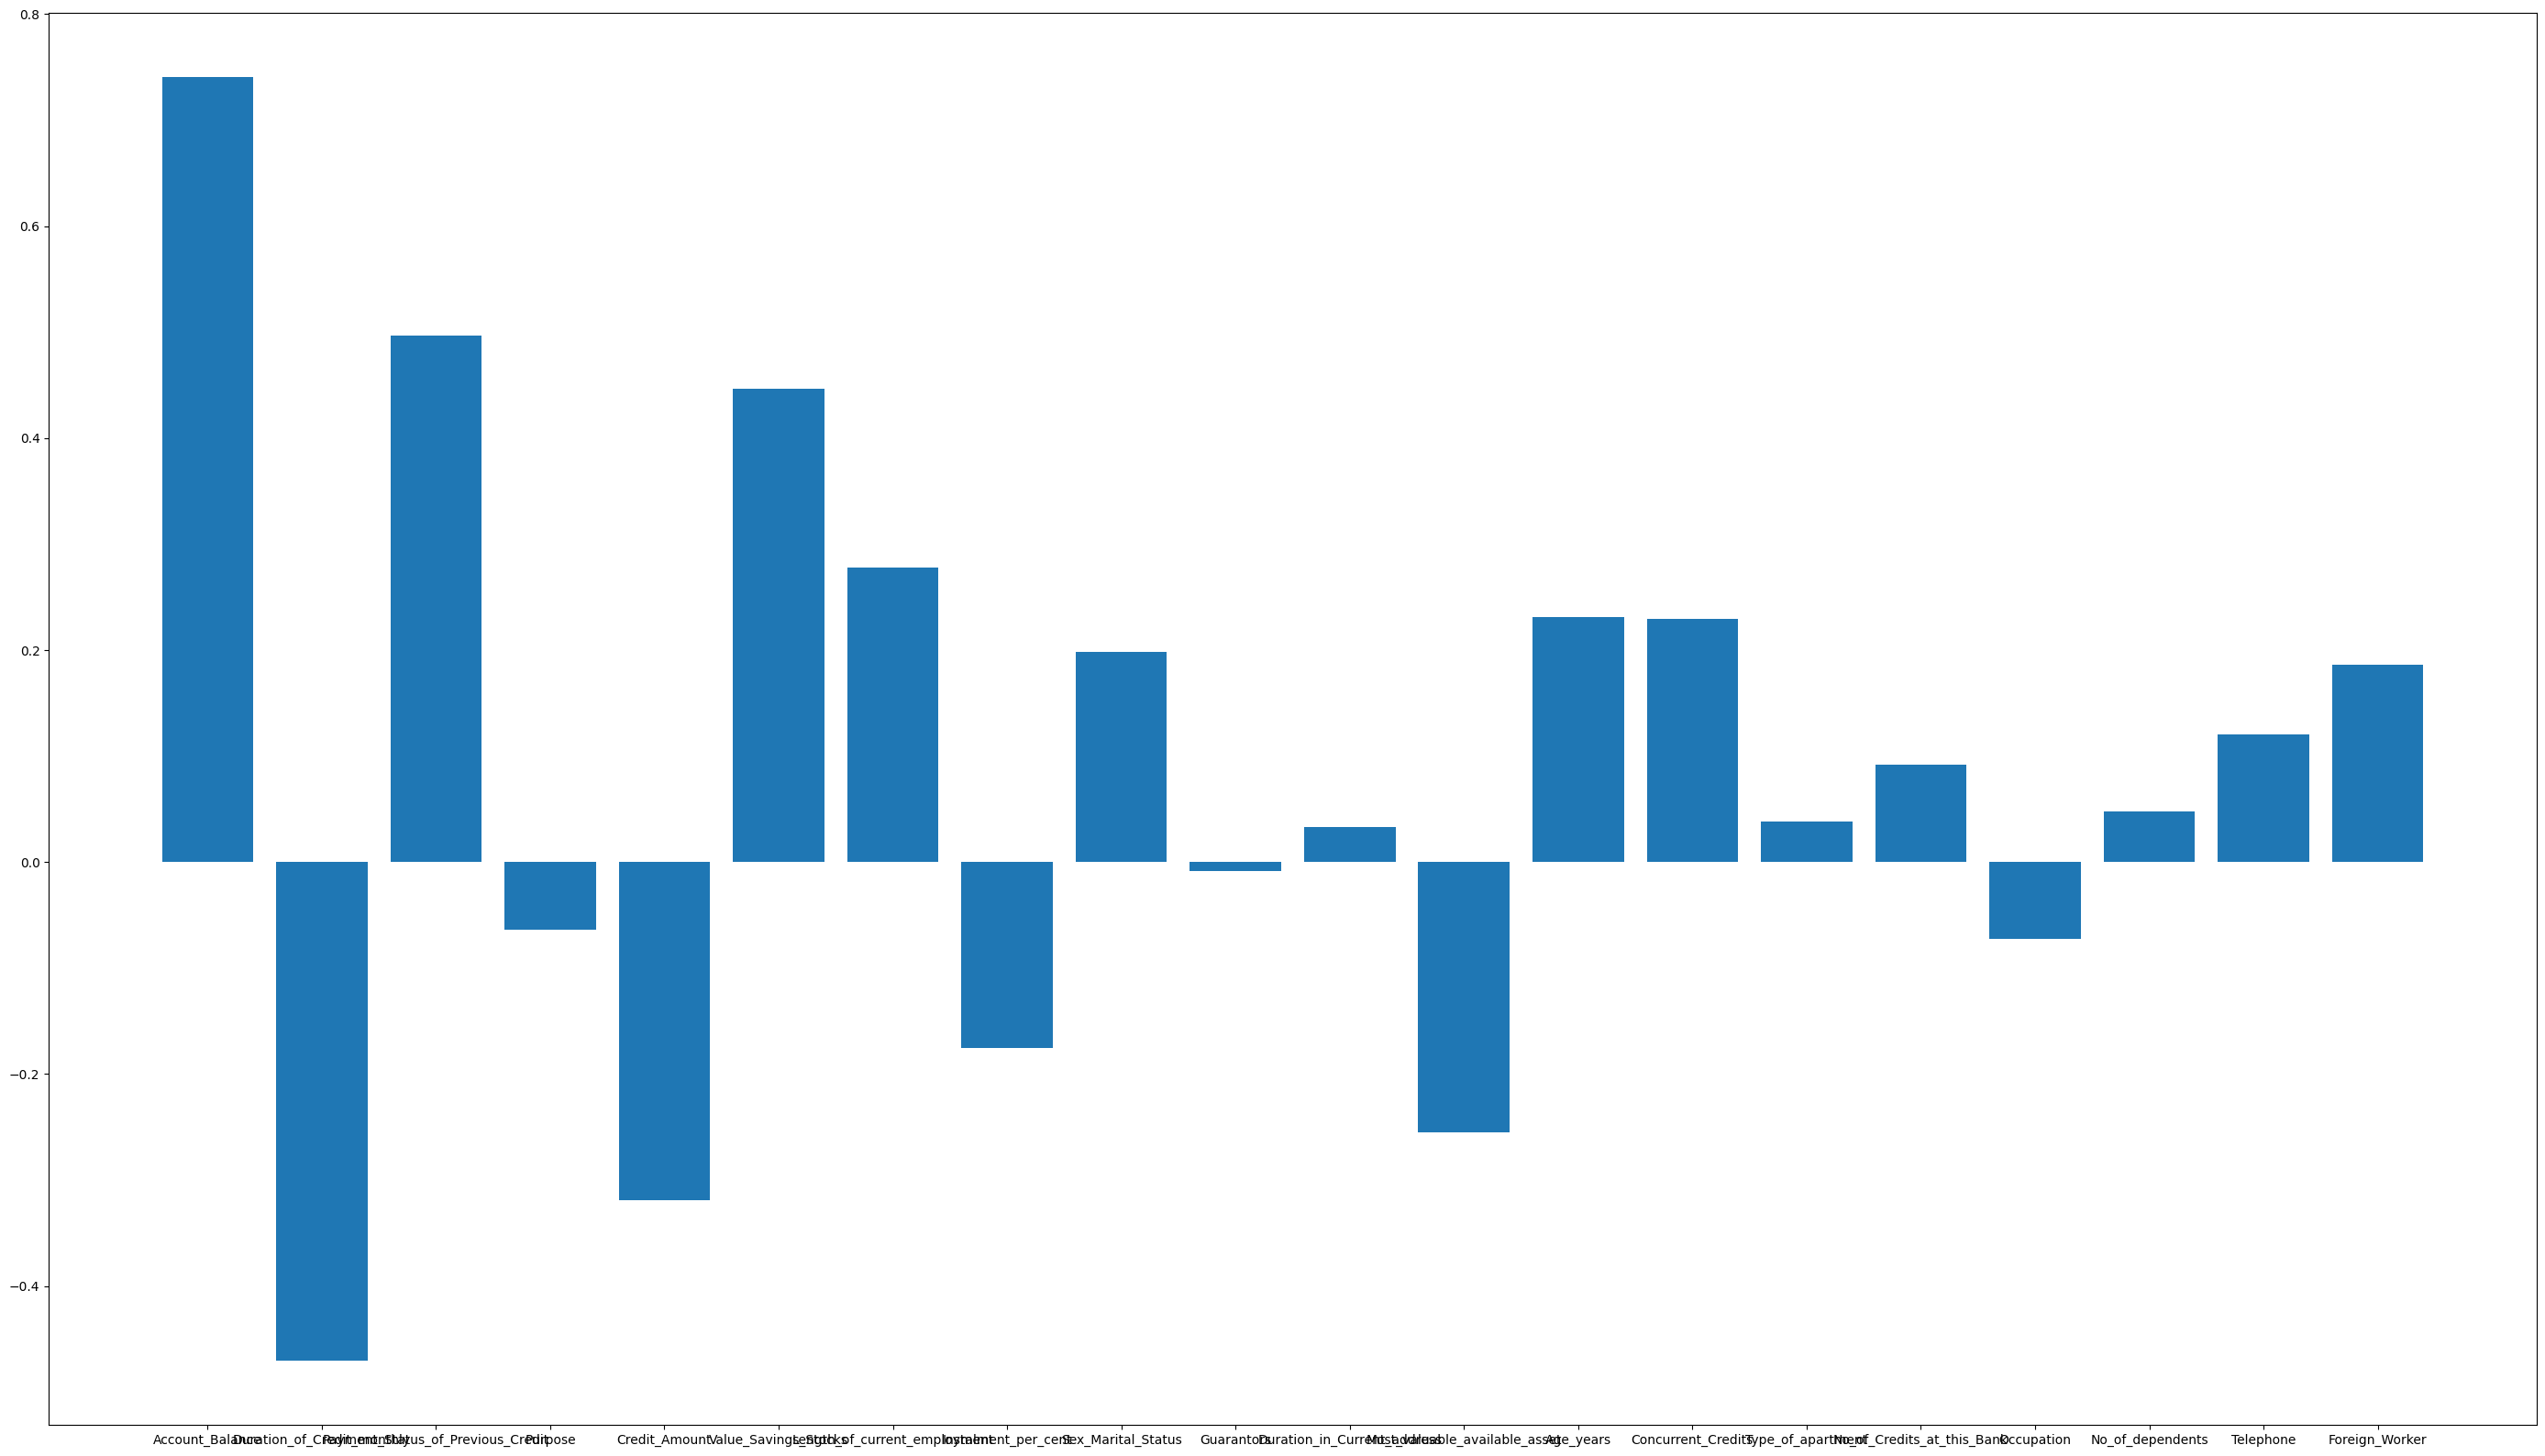

In [8]:
positive = X_train_scaled[np.nonzero(y_train == 1)[0], :]
negative = X_train_scaled[np.nonzero(y_train == 0)[0], :]

print(positive.shape)
correlation = positive.mean(axis=0) - negative.mean(axis=0)

ax = plt.figure(figsize=(35, 20)).subplots()
ax.bar(list(data.columns)[1:], correlation, label='Per-feature correlation')

<BarContainer object of 20 artists>

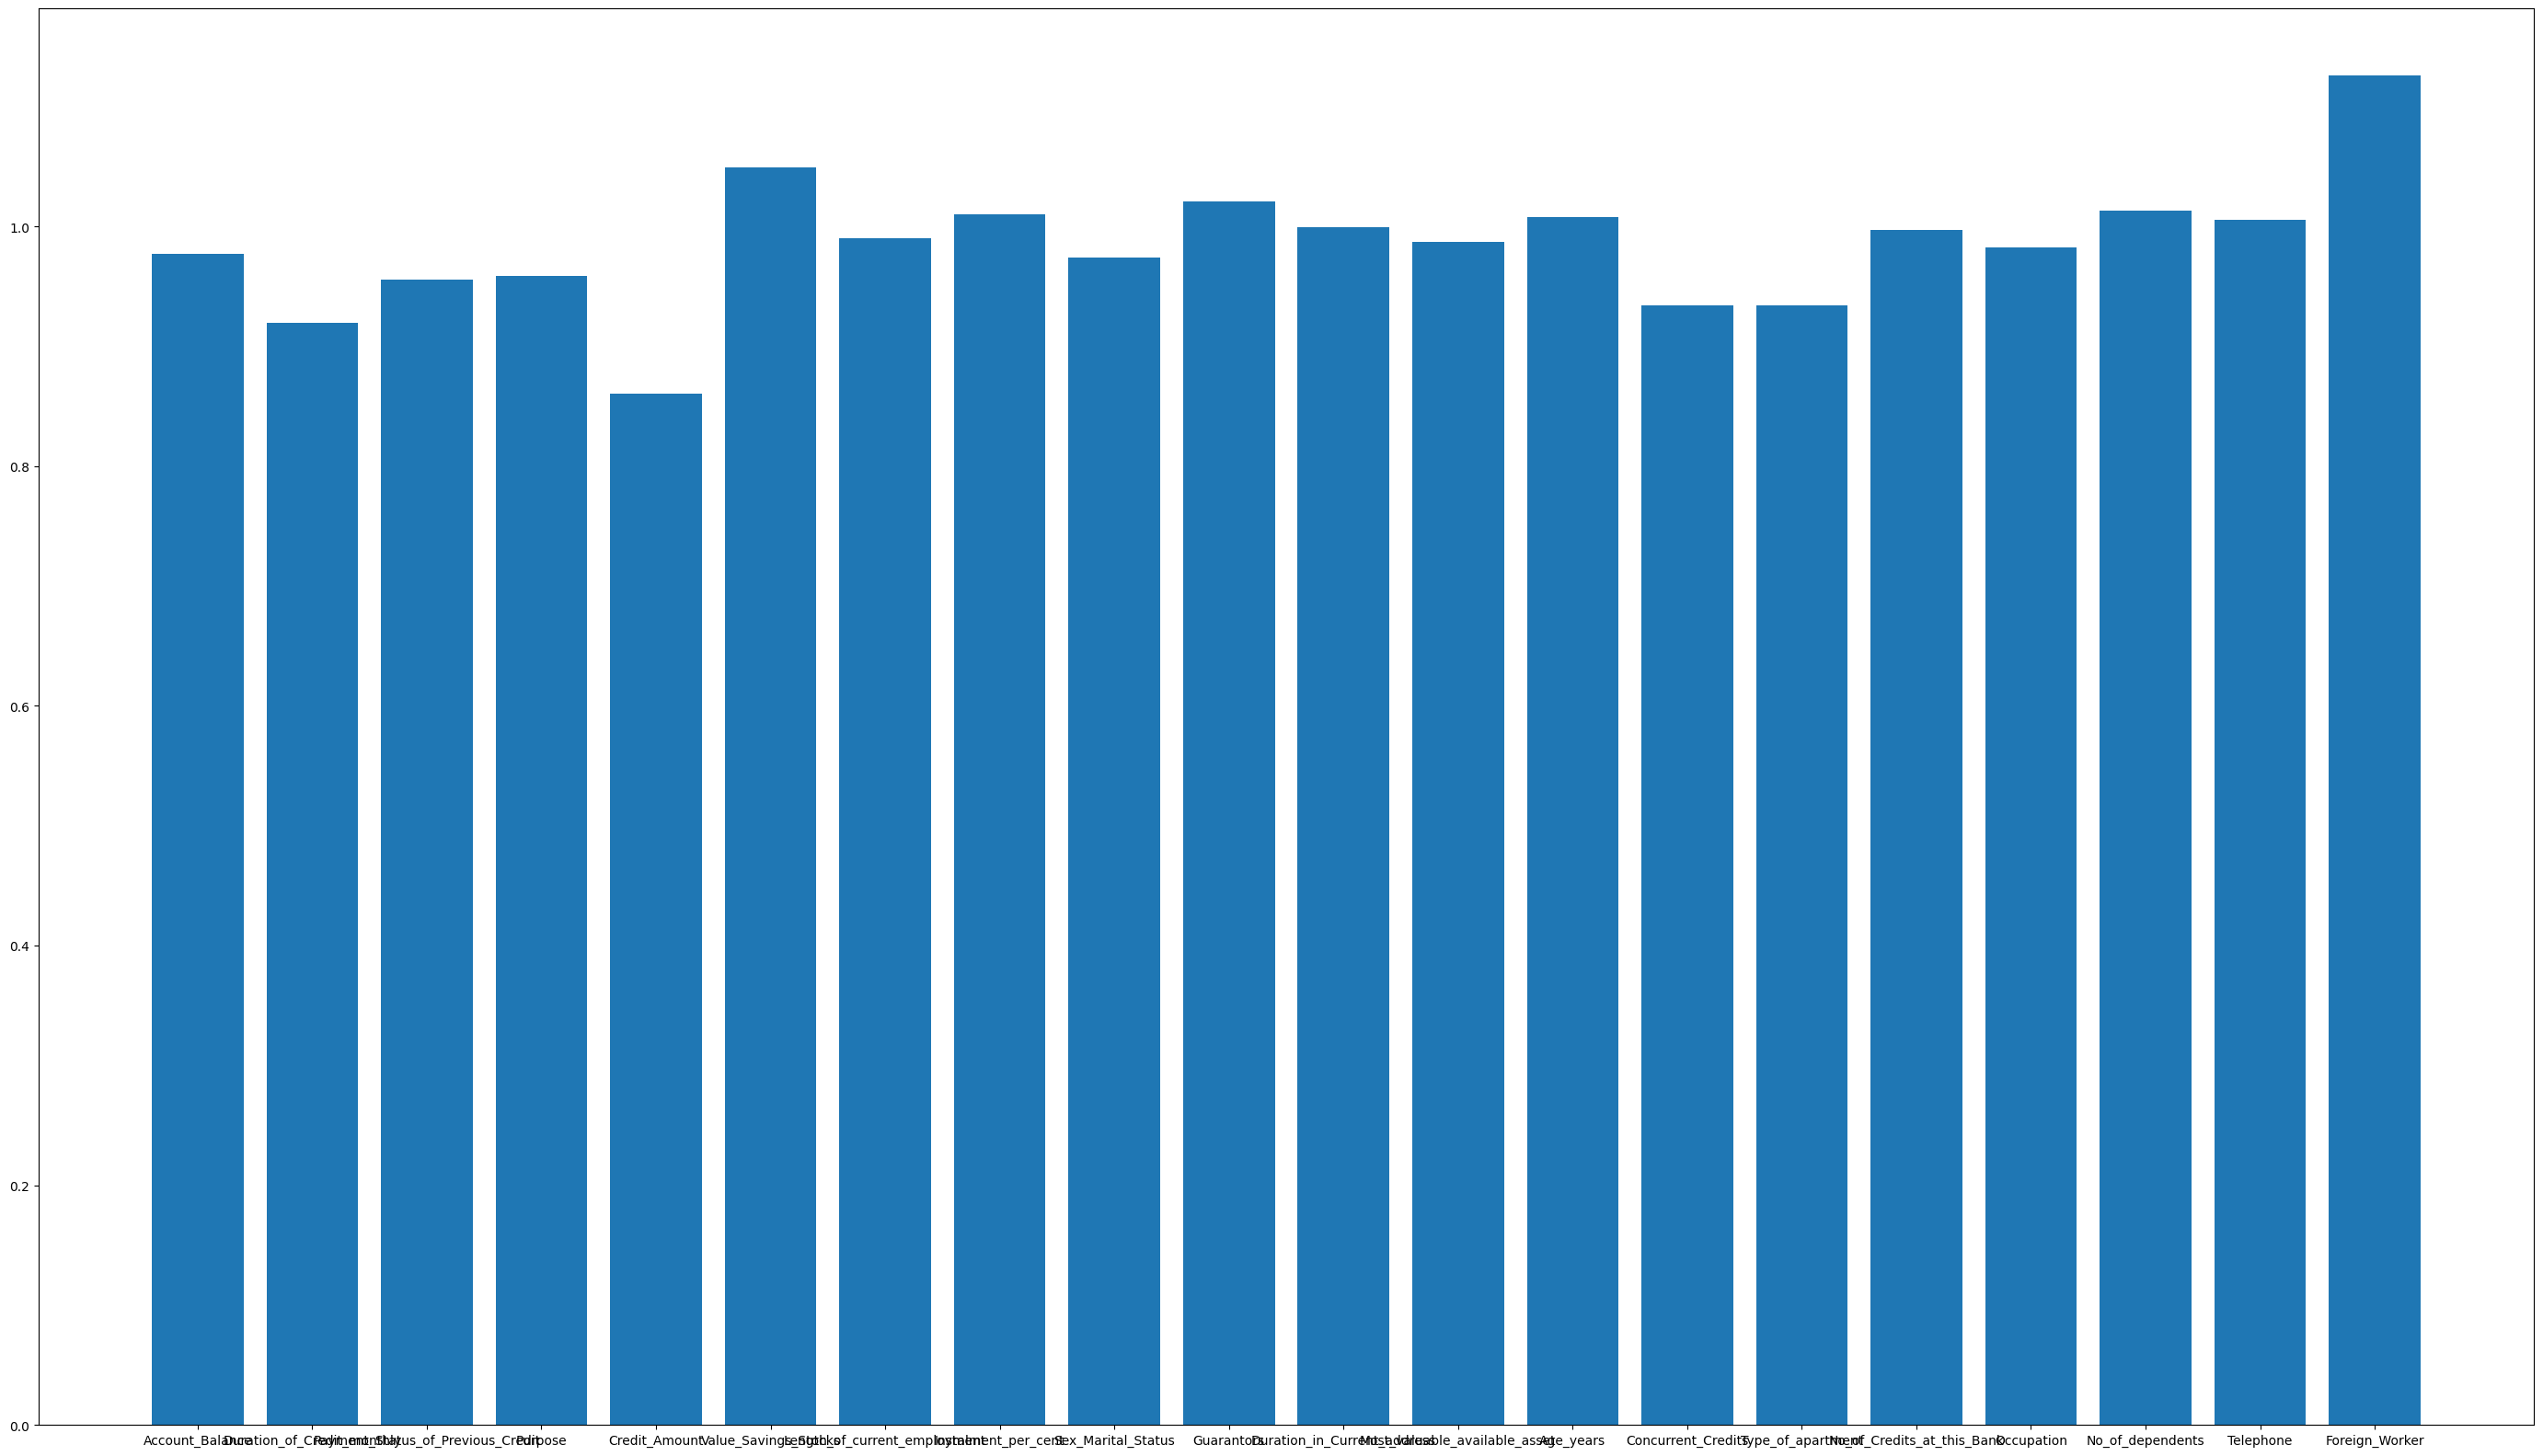

In [9]:
ax = plt.figure(figsize=(35, 20)).subplots()
ax.bar(list(data.columns)[1:], positive.std(axis=0), label='Positive standard deviation')

<BarContainer object of 20 artists>

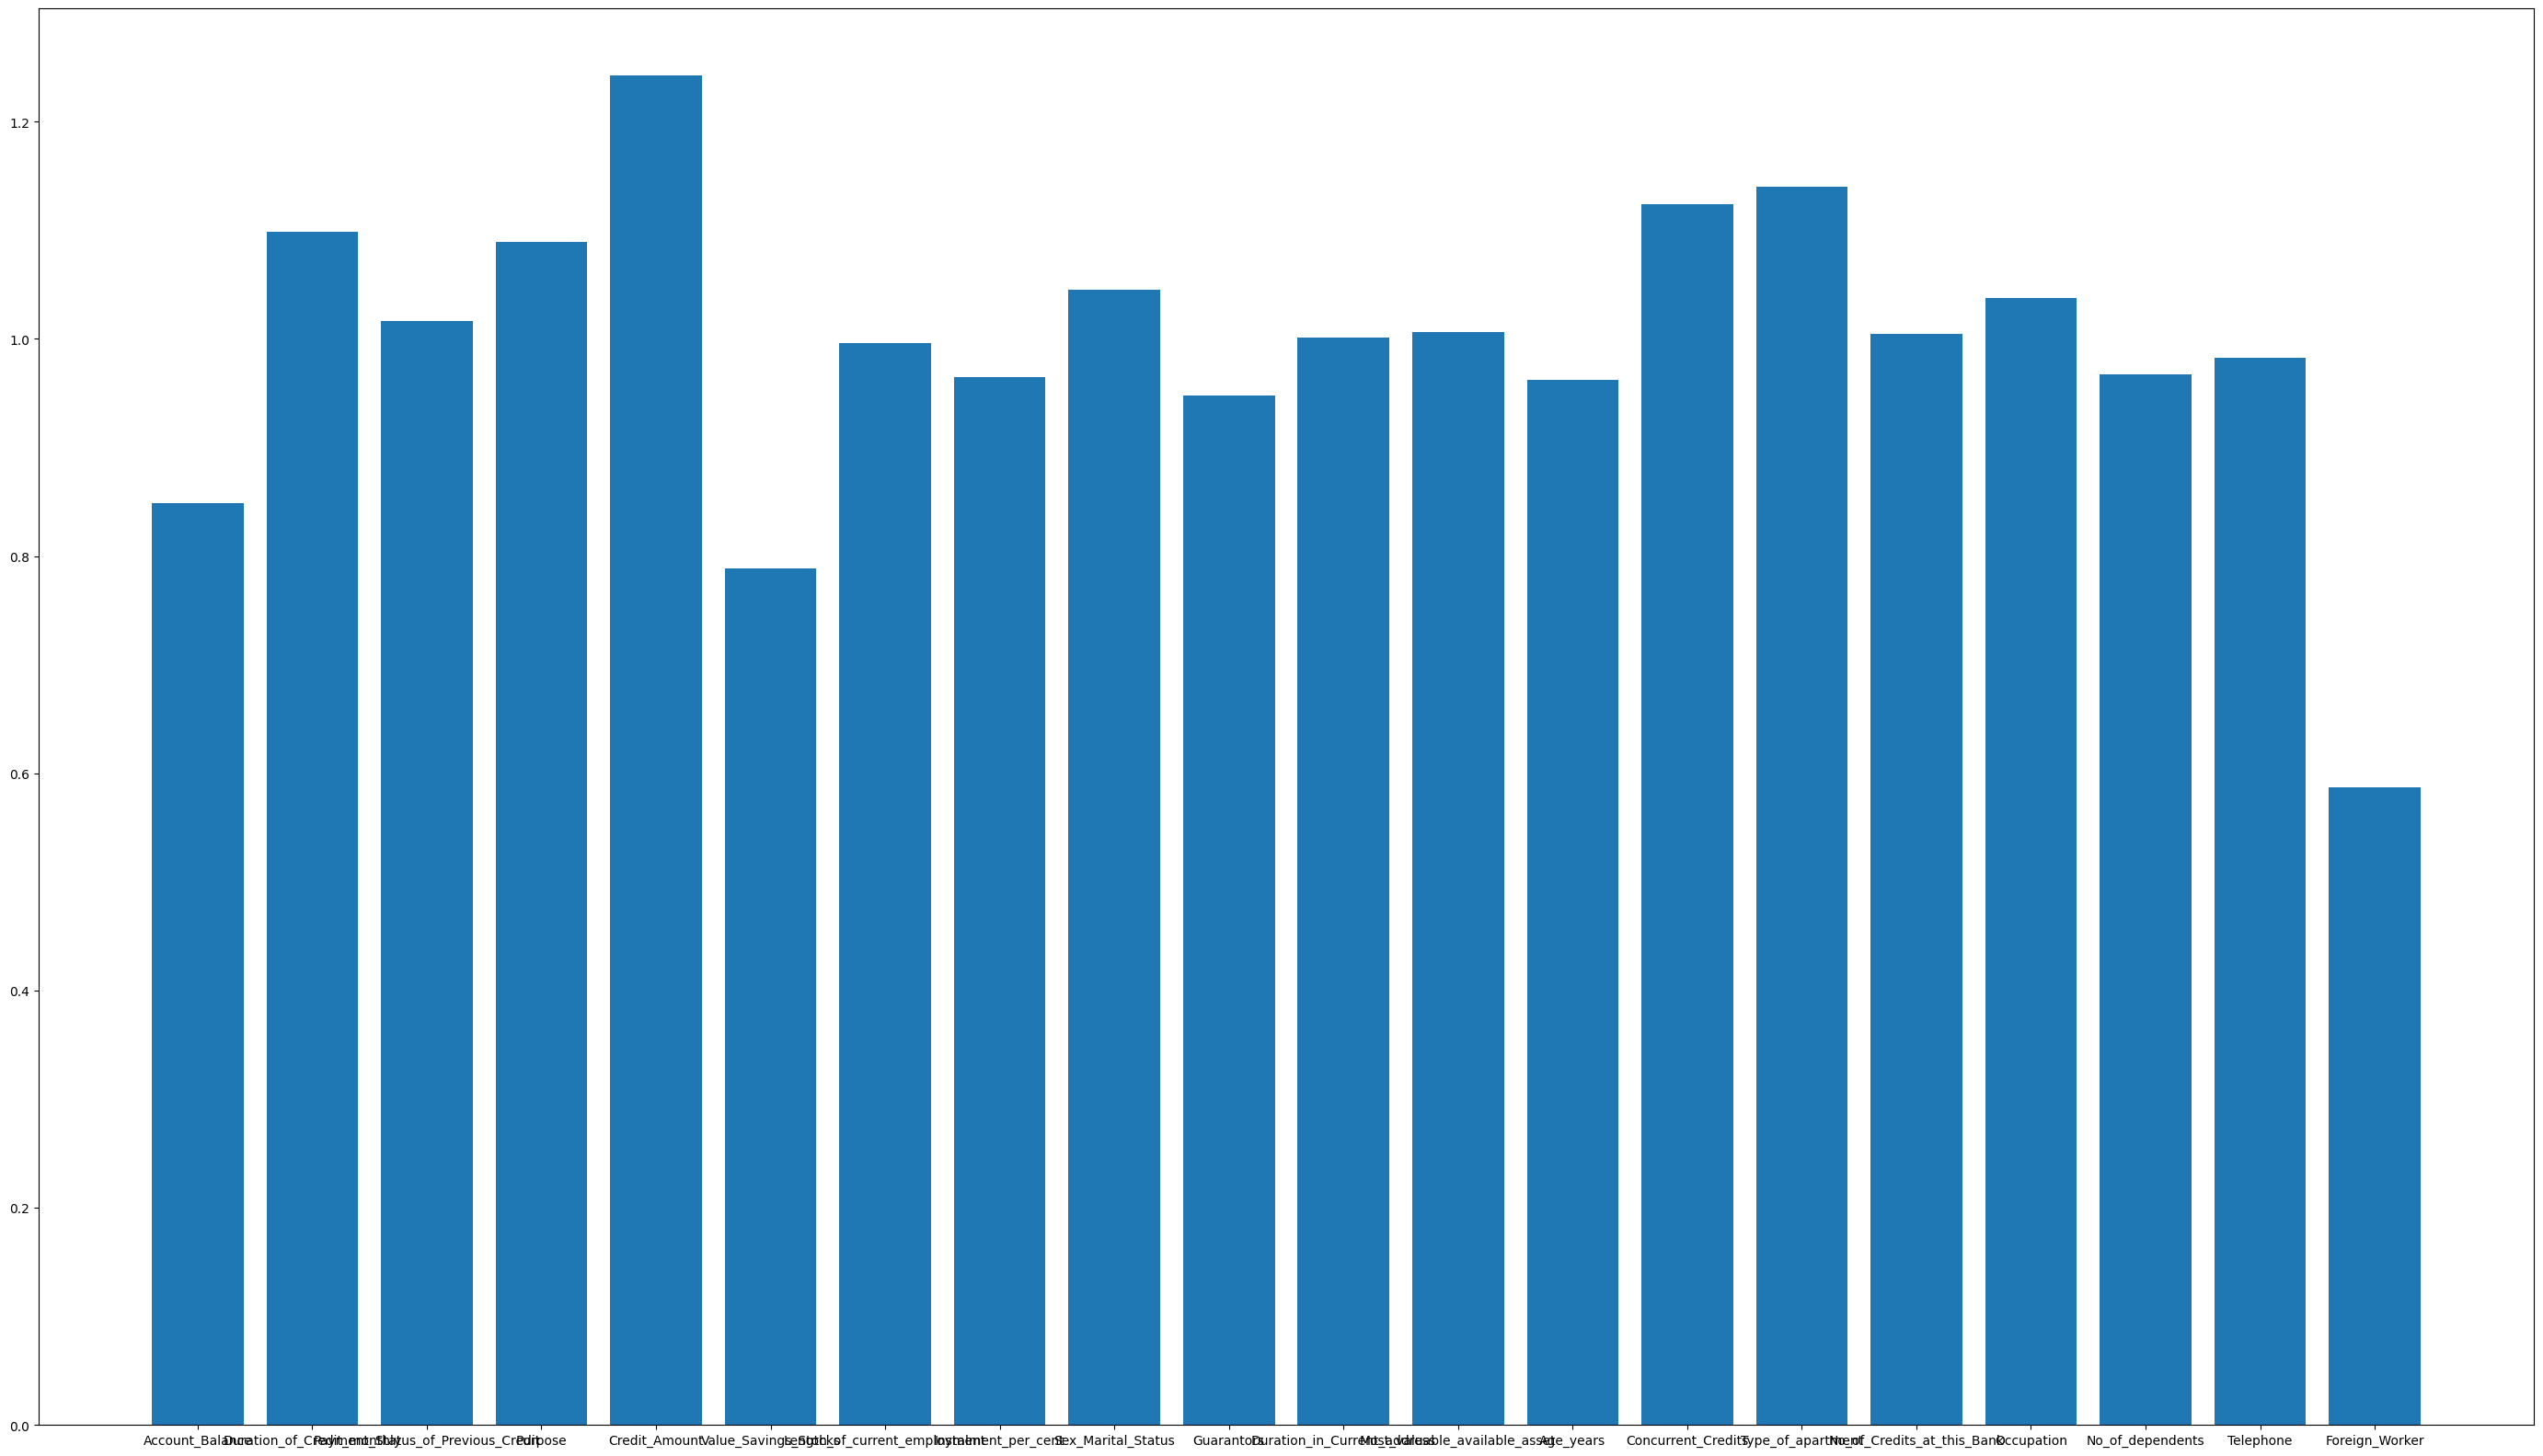

In [10]:
ax = plt.figure(figsize=(35, 20)).subplots()
ax.bar(list(data.columns)[1:], negative.std(axis=0), label='Negative standard deviation')

In [11]:
important_features = np.argsort(-np.abs(correlation))[:10]
print(data.columns[important_features + 1])

Index(['Account_Balance', 'Payment_Status_of_Previous_Credit',
       'Duration_of_Credit_monthly', 'Value_Savings_Stocks', 'Credit_Amount',
       'Length_of_current_employment', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Sex_Marital_Status'],
      dtype='object')


Account_Balance(X) + Value_Savings_Stocks(Y)


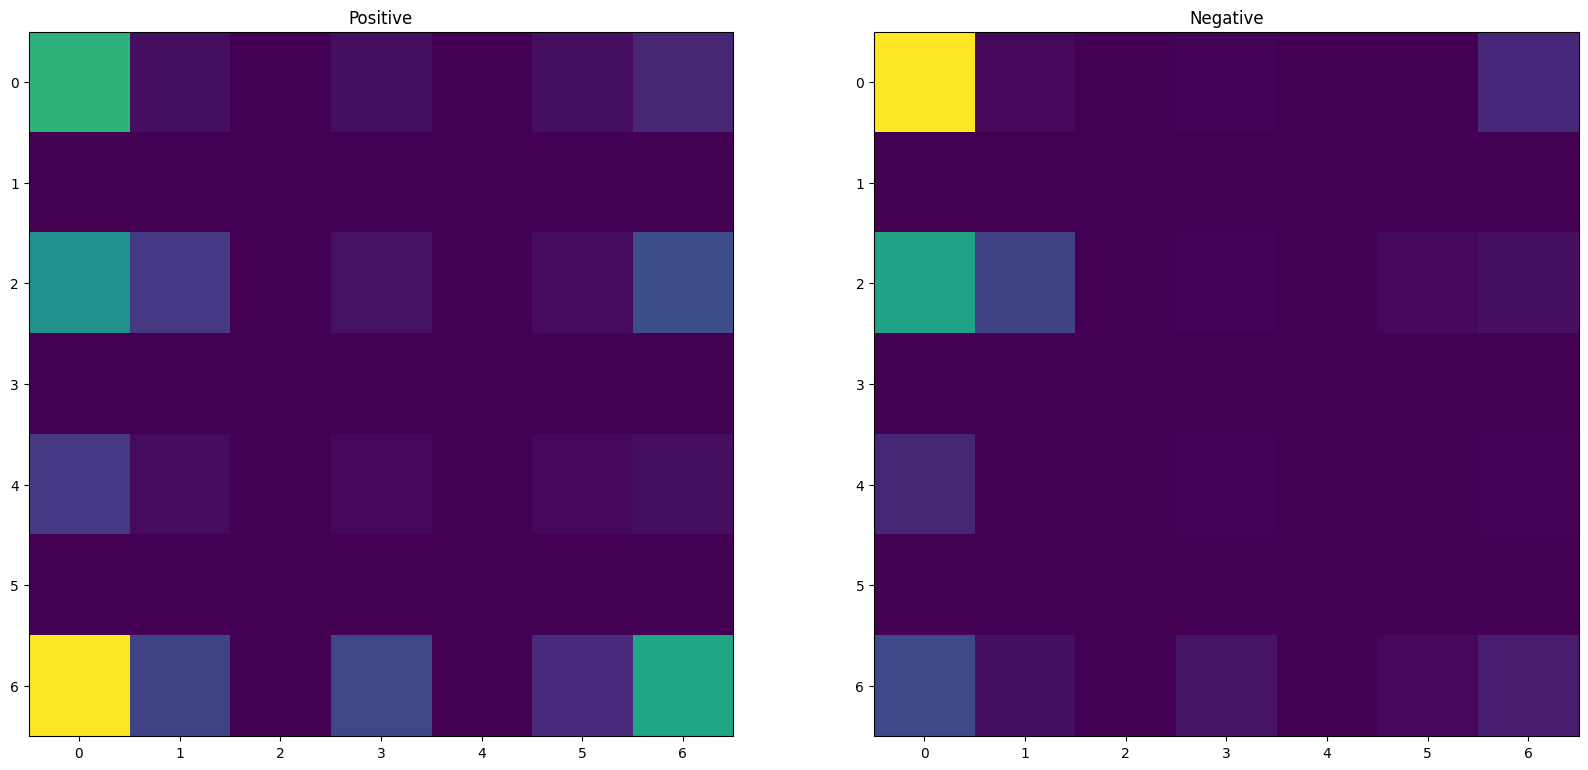

In [12]:
features = 0, 3

feat_x = important_features[features[0]]
feat_y = important_features[features[1]]

fig = plt.figure(figsize=(20, 20))
ax1, ax2 = fig.subplots(ncols=2)
plot_x = positive[:, feat_x]
plot_y = positive[:, feat_y]
ax1.imshow(np.histogram2d(plot_x, plot_y, bins=7)[0])
ax1.set_title('Positive')

plot_x = negative[:, feat_x]
plot_y = negative[:, feat_y]
ax2.imshow(np.histogram2d(plot_x, plot_y, bins=7)[0])
ax2.set_title('Negative')

print(f'{data.columns[feat_x + 1]}(X) + {data.columns[feat_y + 1]}(Y)')

In [13]:
gb_model = RandomForestClassifier(n_estimators=40, random_state=42, class_weight='balanced')
gb_model.fit(X_train[:, important_features], y_train)

test_classifier(gb_model, 'Random Forest + Filt.Features', X_test[:, important_features])

Random Forest + Filt.Features метрики:
ROC AUC: 0.755
Accuracy: 0.775
Precision: 0.789
Recall: 0.920


0.7554347826086957

In [14]:
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.04, random_state=42)
gb_model.fit(X_train, y_train)

test_classifier(gb_model, 'Gradient Boosting Tuned')

Gradient Boosting Tuned метрики:
ROC AUC: 0.744
Accuracy: 0.745
Precision: 0.800
Recall: 0.841


0.7435717625058439

In [15]:
mlp_model = MLPClassifier(hidden_layer_sizes=(30,10), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

test_classifier(mlp_model, 'MLP + Norm', X_test_scaled)

MLP + Norm метрики:
ROC AUC: 0.770
Accuracy: 0.750
Precision: 0.838
Recall: 0.790


0.7697522206638617

In [16]:
mlp_model = MLPClassifier(hidden_layer_sizes=(25,), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled[:, important_features], y_train)

test_classifier(mlp_model, 'MLP + Norm + Filt.Features', X_test_scaled[:, important_features])

MLP + Norm + Filt.Features метрики:
ROC AUC: 0.798
Accuracy: 0.775
Precision: 0.804
Recall: 0.891


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7976858345021037

In [17]:
# Principal Component Analysis  https://stackoverflow.com/a/12273032

pca_matrix = X_train_scaled
U, s, Vt = np.linalg.svd(pca_matrix, full_matrices=False)
V = Vt.T

<BarContainer object of 20 artists>

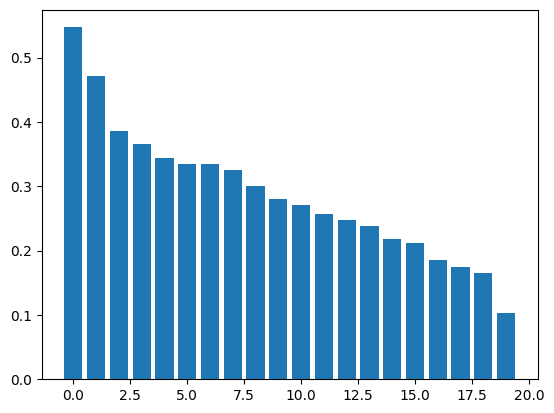

In [18]:
var = s*s / X_train.shape[0]
plt.bar(range(len(var)), np.log10(1 + var))

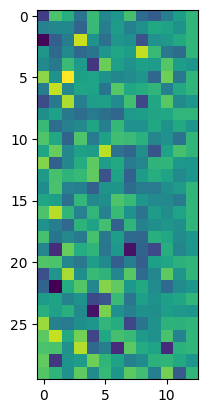

In [19]:
X_train_proj = (X_train_scaled @ V[:, :12])
X_test_proj = (X_test_scaled @ V[:, :12])

plt.imshow(np.concatenate([X_train_proj[:30], 1*y_train[:30, None]], axis=1))

In [20]:
mlp_model = MLPClassifier(hidden_layer_sizes=(25,), max_iter=55, random_state=42)
mlp_model.fit(X_train_proj, y_train)

test_classifier(mlp_model, 'MLP + PCA', X_test_proj)

MLP + PCA метрики:
ROC AUC: 0.796
Accuracy: 0.765
Precision: 0.776
Recall: 0.928


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (55) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7958158017765311

In [21]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=250, random_state=42)
mlp_model.fit(X_train_proj, y_train)

test_classifier(mlp_model, 'MLP 2 hidden + PCA', X_test_proj)

MLP 2 hidden + PCA метрики:
ROC AUC: 0.777
Accuracy: 0.755
Precision: 0.787
Recall: 0.884


C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


0.776647966339411

Random Forest + PCA метрики:
ROC AUC: 0.584
Accuracy: 0.640
Precision: 0.743
Recall: 0.732
Random Forest + PCA метрики:
ROC AUC: 0.615
Accuracy: 0.610
Precision: 0.788
Recall: 0.594
Random Forest + PCA метрики:
ROC AUC: 0.623
Accuracy: 0.660
Precision: 0.730
Recall: 0.804
Random Forest + PCA метрики:
ROC AUC: 0.638
Accuracy: 0.665
Precision: 0.771
Recall: 0.732
Random Forest + PCA метрики:
ROC AUC: 0.705
Accuracy: 0.725
Precision: 0.764
Recall: 0.870
Random Forest + PCA метрики:
ROC AUC: 0.714
Accuracy: 0.710
Precision: 0.790
Recall: 0.790
Random Forest + PCA метрики:
ROC AUC: 0.722
Accuracy: 0.695
Precision: 0.736
Recall: 0.870
Random Forest + PCA метрики:
ROC AUC: 0.732
Accuracy: 0.720
Precision: 0.777
Recall: 0.833
Random Forest + PCA метрики:
ROC AUC: 0.745
Accuracy: 0.725
Precision: 0.752
Recall: 0.899
Random Forest + PCA метрики:
ROC AUC: 0.749
Accuracy: 0.725
Precision: 0.758
Recall: 0.884
Random Forest + PCA метрики:
ROC AUC: 0.758
Accuracy: 0.730
Precision: 0.750
Recall: 0.913

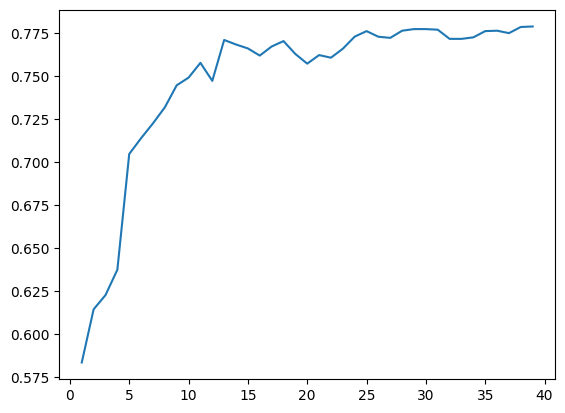

In [22]:
a = []
b = []
for n_estimators in range(1, 40):
    gb_model = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', class_weight='balanced', random_state=42)
    gb_model.fit(X_train_proj, y_train)
    
    a.append(n_estimators)
    b.append(test_classifier(gb_model, 'Random Forest + PCA', X_test_proj))

plt.plot(a, b)